<a href="https://colab.research.google.com/github/VikasYadav-1/Image_classification-dog_vs_cat/blob/main/dog_vs_cat_transfer_learning_mobilenetv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:17<00:00, 89.1MB/s]
100% 1.06G/1.06G [00:17<00:00, 63.5MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (224,224)
)
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (224,224)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [7]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [8]:
num = 1

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num)
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history1 = model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 64s 79ms/step - loss: 0.3683 - accuracy: 0.9592 - val_loss: 0.9513 - val_accuracy: 0.9058
Epoch 2/10
625/625 [==============================] - 47s 74ms/step - loss: 0.1896 - accuracy: 0.9797 - val_loss: 0.2394 - val_accuracy: 0.9770
Epoch 3/10
625/625 [==============================] - 48s 76ms/step - loss: 0.5444 - accuracy: 0.9546 - val_loss: 0.8848 - val_accuracy: 0.9294
Epoch 4/10
625/625 [==============================] - 45s 72ms/step - loss: 0.3571 - accuracy: 0.9714 - val_loss: 0.2434 - val_accuracy: 0.9794
Epoch 5/10
625/625 [==============================] - 48s 76ms/step - loss: 0.2086 - accuracy: 0.9811 - val_loss: 0.2454 - val_accuracy: 0.9798
Epoch 6/10
625/625 [==============================] - 48s 77ms/step - loss: 0.1756 - accuracy: 0.9846 - val_loss: 0.2113 - val_accuracy: 0.9808
Epoch 7/10
625/625 [==============================] - 46s 73ms/step - loss: 0.1925 - accuracy: 0.9840 - val_loss: 0.2206 - val_accuracy:

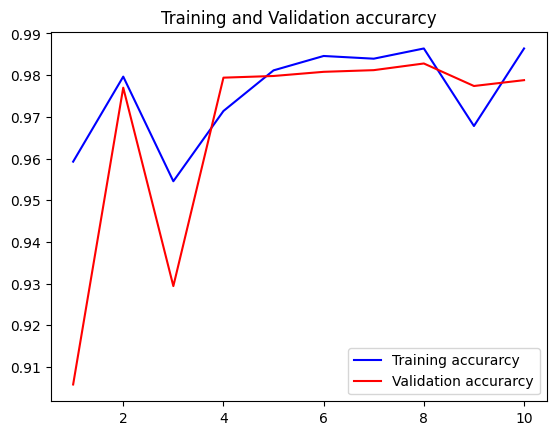

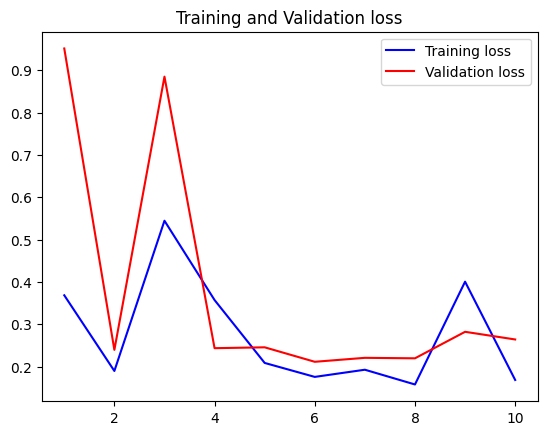

In [12]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()